In [ ]:
# thai nguyen, yen bai, hoa binh, ha noi, nam dinh, hai phong, hai duong
import pandas as pd # type: ignore

# Đọc file CSV
df = pd.read_csv("weather.csv")

# Danh sách các tỉnh cần giữ lại (không dấu)
provinces = ["Ha Noi", "Hoa Binh", "Yen Bai", "Thai Nguyen", 
             "Hai Duong", "Hai Phong", "Nam Dinh",]

# Lọc các hàng có tỉnh nằm trong danh sách
filtered_df = df[df['province'].isin(provinces)]

# Lưu dữ liệu đã lọc ra file CSV mới (tuỳ chọn)
filtered_df.to_csv("temperature.csv", index=False)


In [13]:
import pandas as pd # type: ignore
df = pd.read_csv('temperature.csv')
# axis = 1: xoá theo cột, = 0 :theo hàng
df.drop(['wind', 'wind_d', 'rain', 'humidi', 'cloud', 'pressure'],
                           axis=1,inplace = True)
df.to_csv('temperature.csv',index= False)

In [29]:
import pandas as pd # type: ignore

df = pd.read_csv('temperature.csv')

# Chuyển đổi cột 'date' thành định dạng datetime
df['date'] = pd.to_datetime(df['date'])

df['year'] = df['date'].dt.year

# Tạo cột 'month' từ cột 'date'
df['month'] = df['date'].dt.month

# Hàm để phân loại tháng thành mùa
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'  # Mùa đông
    elif month in [3, 4, 5]:
        return 'Spring'  # Mùa xuân
    elif month in [6, 7, 8]:
        return 'Summer'  # Mùa hè
    elif month in [9, 10, 11]:
        return 'Autumn'  # Mùa thu

# Áp dụng hàm để tạo cột 'season'
df['season'] = df['month'].apply(get_season)
df.to_csv('temperature.csv',index= False)


In [31]:
import pandas as pd # type: ignore
mean_season = df.groupby(['year', 'season'])['mean_temp'].mean()

# Chuyển kết quả thành DataFrame và đặt lại chỉ mục
mean_season = mean_season.reset_index().round(1)

mean_season.to_csv('mean_season.csv', index=False)

In [32]:
# Giả sử cột 'avg_temp' là nhiệt độ trung bình, cột 'year' là năm
df_avg_temp = mean_season[['year', 'mean_temp']]

# Kiểm tra dữ liệu sau khi lọc
print(df_avg_temp.head())


   year  mean_temp
0  2009       24.9
1  2009       24.8
2  2009       29.1
3  2009       19.8
4  2010       25.1


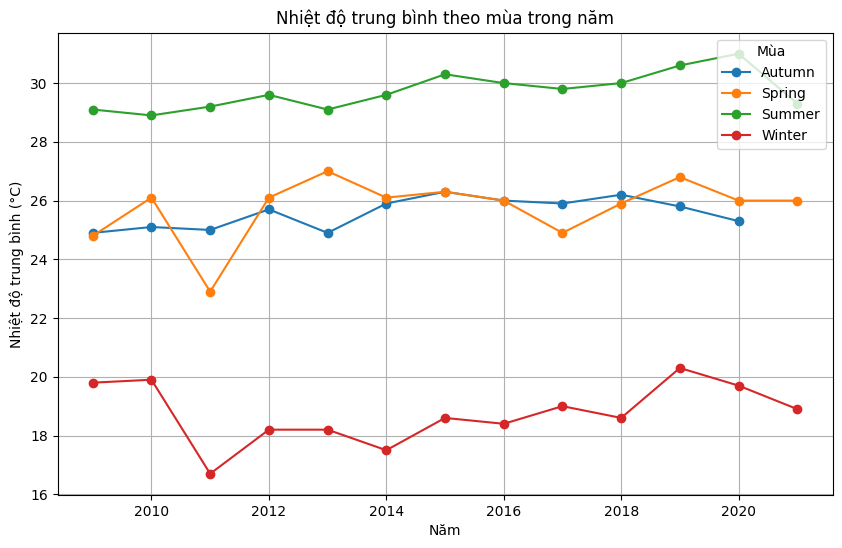

In [34]:
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore

# Đọc dữ liệu từ CSV
df = pd.read_csv('mean_season.csv')

# Tạo biểu đồ
plt.figure(figsize=(10, 6))
for season in df['season'].unique():
    season_data = df[df['season'] == season]
    plt.plot(season_data['year'], season_data['mean_temp'], marker='o', label=season)

# Cài đặt tiêu đề và nhãn trục
plt.title('Nhiệt độ trung bình theo mùa trong năm')
plt.xlabel('Năm')
plt.ylabel('Nhiệt độ trung bình (°C)')
plt.legend(title='Mùa',loc = 'upper right')

# Hiển thị biểu đồ
plt.grid(True)
plt.show()
